# Transfer from walking to other tasks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jax.numpy as jnp
from qdax.utils.plotting import plot_2d_map_elites_repertoire
from scipy.stats import ranksums
import numpy as np
%matplotlib inline

In [18]:
tasks = ["BridgeWalker-v0", "CustomCarrier-v0", "PlatformJumper-v0", "CaveCrawler-v0",
         "BidirectionalWalker-v0",

         # object manipulation
         "CustomPusher-v0",
         # ("Thrower-v0" # gives error
         "BeamToppler-v0",
         "Pusher-v1",
         # ("Carrier-v1" # gives error
         "Catcher-v0",
         # ("Slider-v0" # gives error
         # ("Lifter-v0" # gives error

         # all climb give error because too narrow

         # locomotion
         "UpStepper-v0",
         "DownStepper-v0",
         "ObstacleTraverser-v0",
         "ObstacleTraverser-v1",
         "Hurdler-v0",
         "GapJumper-v0",
         "Traverser-v0",

         # misc
         "Flipper-v0",
         "Jumper-v0",
         "Balancer-v0",
         # ("Balancer-v1" # gives error

         # shape change
         "AreaMaximizer-v0",
         "AreaMinimizer-v0",
         "WingspanMazimizer-v0",
         "HeightMaximizer-v0",
         ]

In [19]:
evo_dfs = []
sampling = "all"
for task in tasks:
    processed_task = task.replace("-v0", "").lower()
    for seed in range(10):
        try:
            tmp_df = pd.read_csv(f"../results/me_nn/PCA-evo-body-10x10-{processed_task}-{sampling}_{seed}.csv")
            tmp_df["seed"] = seed
            tmp_df["task"] = task
            tmp_df["sampling"] = "evo_me"  # sampling
            tmp_df["repertoire"] = "all"
            evo_dfs.append(tmp_df)
        except FileNotFoundError:
            print("me", task, seed)

        try:
            tmp_df = pd.read_csv(f"../results/ga/evo-body-nn-10x10-{processed_task}_{seed}.csv")
            tmp_df["seed"] = seed
            tmp_df["task"] = task
            tmp_df["sampling"] = "evo_ga"  # sampling
            tmp_df["repertoire"] = "all"
            evo_dfs.append(tmp_df)
        except FileNotFoundError:
            print("ga", task, seed)
evo_df = pd.concat(evo_dfs, ignore_index=True)
evo_df.head()

me BidirectionalWalker-v0 0
ga BidirectionalWalker-v0 0
me BidirectionalWalker-v0 1
ga BidirectionalWalker-v0 1
me BidirectionalWalker-v0 2
ga BidirectionalWalker-v0 2
me BidirectionalWalker-v0 3
ga BidirectionalWalker-v0 3
me BidirectionalWalker-v0 4
ga BidirectionalWalker-v0 4
me BidirectionalWalker-v0 5
ga BidirectionalWalker-v0 5
me BidirectionalWalker-v0 6
ga BidirectionalWalker-v0 6
me BidirectionalWalker-v0 7
ga BidirectionalWalker-v0 7
me BidirectionalWalker-v0 8
ga BidirectionalWalker-v0 8
me BidirectionalWalker-v0 9
ga BidirectionalWalker-v0 9
me CustomPusher-v0 0
ga CustomPusher-v0 0
me CustomPusher-v0 1
ga CustomPusher-v0 1
me CustomPusher-v0 2
ga CustomPusher-v0 2
me CustomPusher-v0 3
ga CustomPusher-v0 3
me CustomPusher-v0 4
ga CustomPusher-v0 4
me CustomPusher-v0 5
ga CustomPusher-v0 5
me CustomPusher-v0 6
ga CustomPusher-v0 6
me CustomPusher-v0 7
ga CustomPusher-v0 7
me CustomPusher-v0 8
ga CustomPusher-v0 8
me CustomPusher-v0 9
ga CustomPusher-v0 9
me BeamToppler-v0 0


,iteration,max_fitness,qd_score1,qd_score2,qd_score3,coverage1,coverage2,coverage3,time,current_time,invalid_individuals,seed,task,sampling,repertoire
0,1,0.729593,4.107603,3.180826,-2.729089,3.125000,5.859375,2.441406,16.063047,2024-12-15 02:23:21.035042,0.0,0,BridgeWalker-v0,evo_me,all
1,2,0.729593,7.045090,5.852021,-4.464395,3.125000,7.714844,2.929688,10.360067,2024-12-15 02:23:31.395462,0.0,0,BridgeWalker-v0,evo_me,all
2,3,0.729593,8.622374,11.778327,-5.439826,3.320312,9.863281,3.222656,10.696720,2024-12-15 02:23:42.092719,0.0,0,BridgeWalker-v0,evo_me,all
3,4,0.729593,9.434374,16.245940,-6.441874,3.417969,11.230469,3.320312,10.675258,2024-12-15 02:23:52.768443,0.0,0,BridgeWalker-v0,evo_me,all
4,5,0.767838,10.914474,16.354479,-5.442212,3.417969,12.109375,3.417969,10.541582,2024-12-15 02:24:03.310500,0.0,0,BridgeWalker-v0,evo_me,all


## Processing time

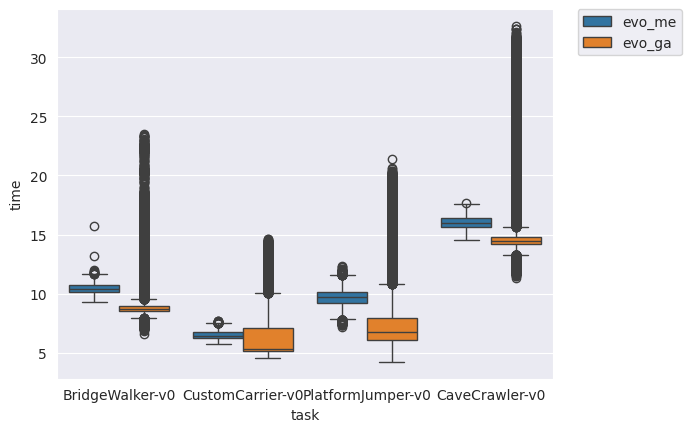

In [20]:
sns.boxplot(
    evo_df[evo_df["iteration"] > 5],
    x="task",
    y="time",
    hue="sampling",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## Evolution results

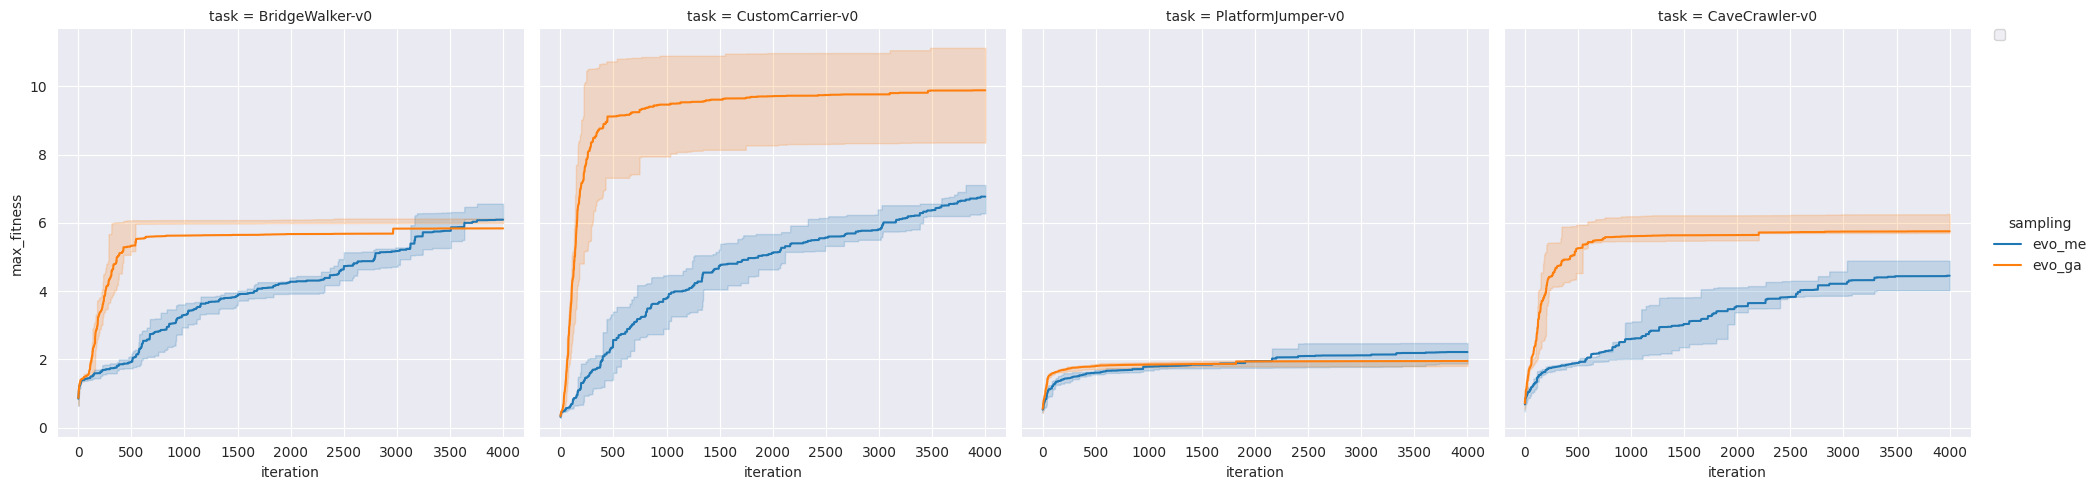

In [5]:
sns.relplot(
    data=evo_df, x="iteration", y="max_fitness", col="task",
    hue="sampling", kind="line", errorbar=("pi", 50),
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.show()

In [21]:
final_evo_df = evo_df[evo_df["iteration"] == max(evo_df["iteration"])][
    ["max_fitness", "coverage1", "coverage2", "coverage3", "task", "seed", "sampling", "repertoire"]]
final_evo_df.head()

,max_fitness,coverage1,coverage2,coverage3,task,seed,sampling,repertoire
3999,4.980334,100.00000,53.808594,32.617188,BridgeWalker-v0,0,evo_me,all
7999,6.305940,NaN,NaN,NaN,BridgeWalker-v0,0,evo_ga,all
11999,6.518347,91.60156,55.468750,35.742188,BridgeWalker-v0,1,evo_me,all
15999,6.185040,NaN,NaN,NaN,BridgeWalker-v0,1,evo_ga,all
19999,6.686930,100.00000,54.199220,27.734375,BridgeWalker-v0,2,evo_me,all


## Task transfer results

In [22]:
dfs = [final_evo_df]
samplings = ["all", "s1", "s2", "s3"]
repertoires = [f"g{i + 1}" for i in range(3)]
for task in tasks:
    for seed in range(10):
        tmp_df = pd.read_csv(f"../results/transfer_nn/ga_evo-body-nn-10x10-walker_{seed}_{task}.csv")
        tmp_df["seed"] = seed
        tmp_df["task"] = task
        tmp_df["sampling"] = "ga"
        tmp_df["repertoire"] = "all"
        tmp_df["max_fitness"] = tmp_df["max_fitness"].apply(lambda x: float(x.replace("[", "").replace("]", "")))
        dfs.append(tmp_df)

        for sampling in samplings:
            for rep in repertoires:
                tmp_df = pd.read_csv(
                    f"../results/transfer_nn_pca/me_PCA-evo-body-10x10-walker-{sampling}_{seed}_{rep}_best50_{task}.csv")
                tmp_df["seed"] = seed
                tmp_df["task"] = task
                tmp_df["sampling"] = sampling
                tmp_df["repertoire"] = rep
                dfs.append(tmp_df)
df = pd.concat(dfs)
df.head()

,max_fitness,coverage1,coverage2,coverage3,task,seed,sampling,repertoire
3999,4.980334,100.00000,53.808594,32.617188,BridgeWalker-v0,0,evo_me,all
7999,6.305940,NaN,NaN,NaN,BridgeWalker-v0,0,evo_ga,all
11999,6.518347,91.60156,55.468750,35.742188,BridgeWalker-v0,1,evo_me,all
15999,6.185040,NaN,NaN,NaN,BridgeWalker-v0,1,evo_ga,all
19999,6.686930,100.00000,54.199220,27.734375,BridgeWalker-v0,2,evo_me,all


In [23]:
tasks_extra_data = {
    "BridgeWalker-v0": ("walking", 6.6),
    "BidirectionalWalker-v0": ("walking", 8.7),

    "CustomCarrier-v0": ("object", 10.8),
    "CustomPusher-v0": ("object", 9.5),
    "Pusher-v1": ("object", 8.2),
    "Catcher-v0": ("object", -1.2),
    "BeamToppler-v0": ("object", 9.2),

    "UpStepper-v0": ("locomotion", 7.8),
    "DownStepper-v0": ("locomotion", 9.1),
    "ObstacleTraverser-v0": ("locomotion", 9.5),
    "ObstacleTraverser-v1": ("locomotion", 5.1),
    "Hurdler-v0": ("locomotion", 4.2),
    "PlatformJumper-v0": ("locomotion", 5.8),
    "GapJumper-v0": ("locomotion", 7.8),
    "Traverser-v0": ("locomotion", 5.9),
    "CaveCrawler-v0": ("locomotion", 5.6),

    "AreaMaximizer-v0": ("shape", 2.8),
    "AreaMinimizer-v0": ("shape", 1),
    "WingspanMazimizer-v0": ("shape", .87),
    "HeightMaximizer-v0": ("shape", .5),

    "Flipper-v0": ("misc", 48.3),
    "Jumper-v0": ("misc", 4.9),
    "Balancer-v0": ("misc", .16),
}


def assign_task_type(row):
    return tasks_extra_data[row.task][0]


def assign_expected_reward_type(row):
    return tasks_extra_data[row.task][1]


df["task_type"] = df.apply(assign_task_type, axis=1)
df["task_expected_reward"] = df.apply(assign_expected_reward_type, axis=1)

In [24]:
median_df = df.groupby(["task", "sampling", "repertoire", "task_type", "task_expected_reward"])[
    "max_fitness"].median().reset_index()
median_df

,task,sampling,repertoire,task_type,task_expected_reward,max_fitness
0,AreaMaximizer-v0,all,g1,shape,2.80,0.509064
1,AreaMaximizer-v0,all,g2,shape,2.80,0.612332
2,AreaMaximizer-v0,all,g3,shape,2.80,0.574938
3,AreaMaximizer-v0,ga,all,shape,2.80,0.509479
4,AreaMaximizer-v0,s1,g1,shape,2.80,0.431670
...,...,...,...,...,...,...
302,WingspanMazimizer-v0,s2,g2,shape,0.87,0.431740
303,WingspanMazimizer-v0,s2,g3,shape,0.87,0.491116
304,WingspanMazimizer-v0,s3,g1,shape,0.87,0.636770
305,WingspanMazimizer-v0,s3,g2,shape,0.87,0.700445


In [25]:
max_df = df.groupby(["task", "task_type", "task_expected_reward"])["max_fitness"].max().reset_index()
max_df["min_solve_reward"] = 0.8 * max_df["task_expected_reward"]
solved_tasks = max_df[max_df["max_fitness"] >= max_df["min_solve_reward"]]["task"].tolist()

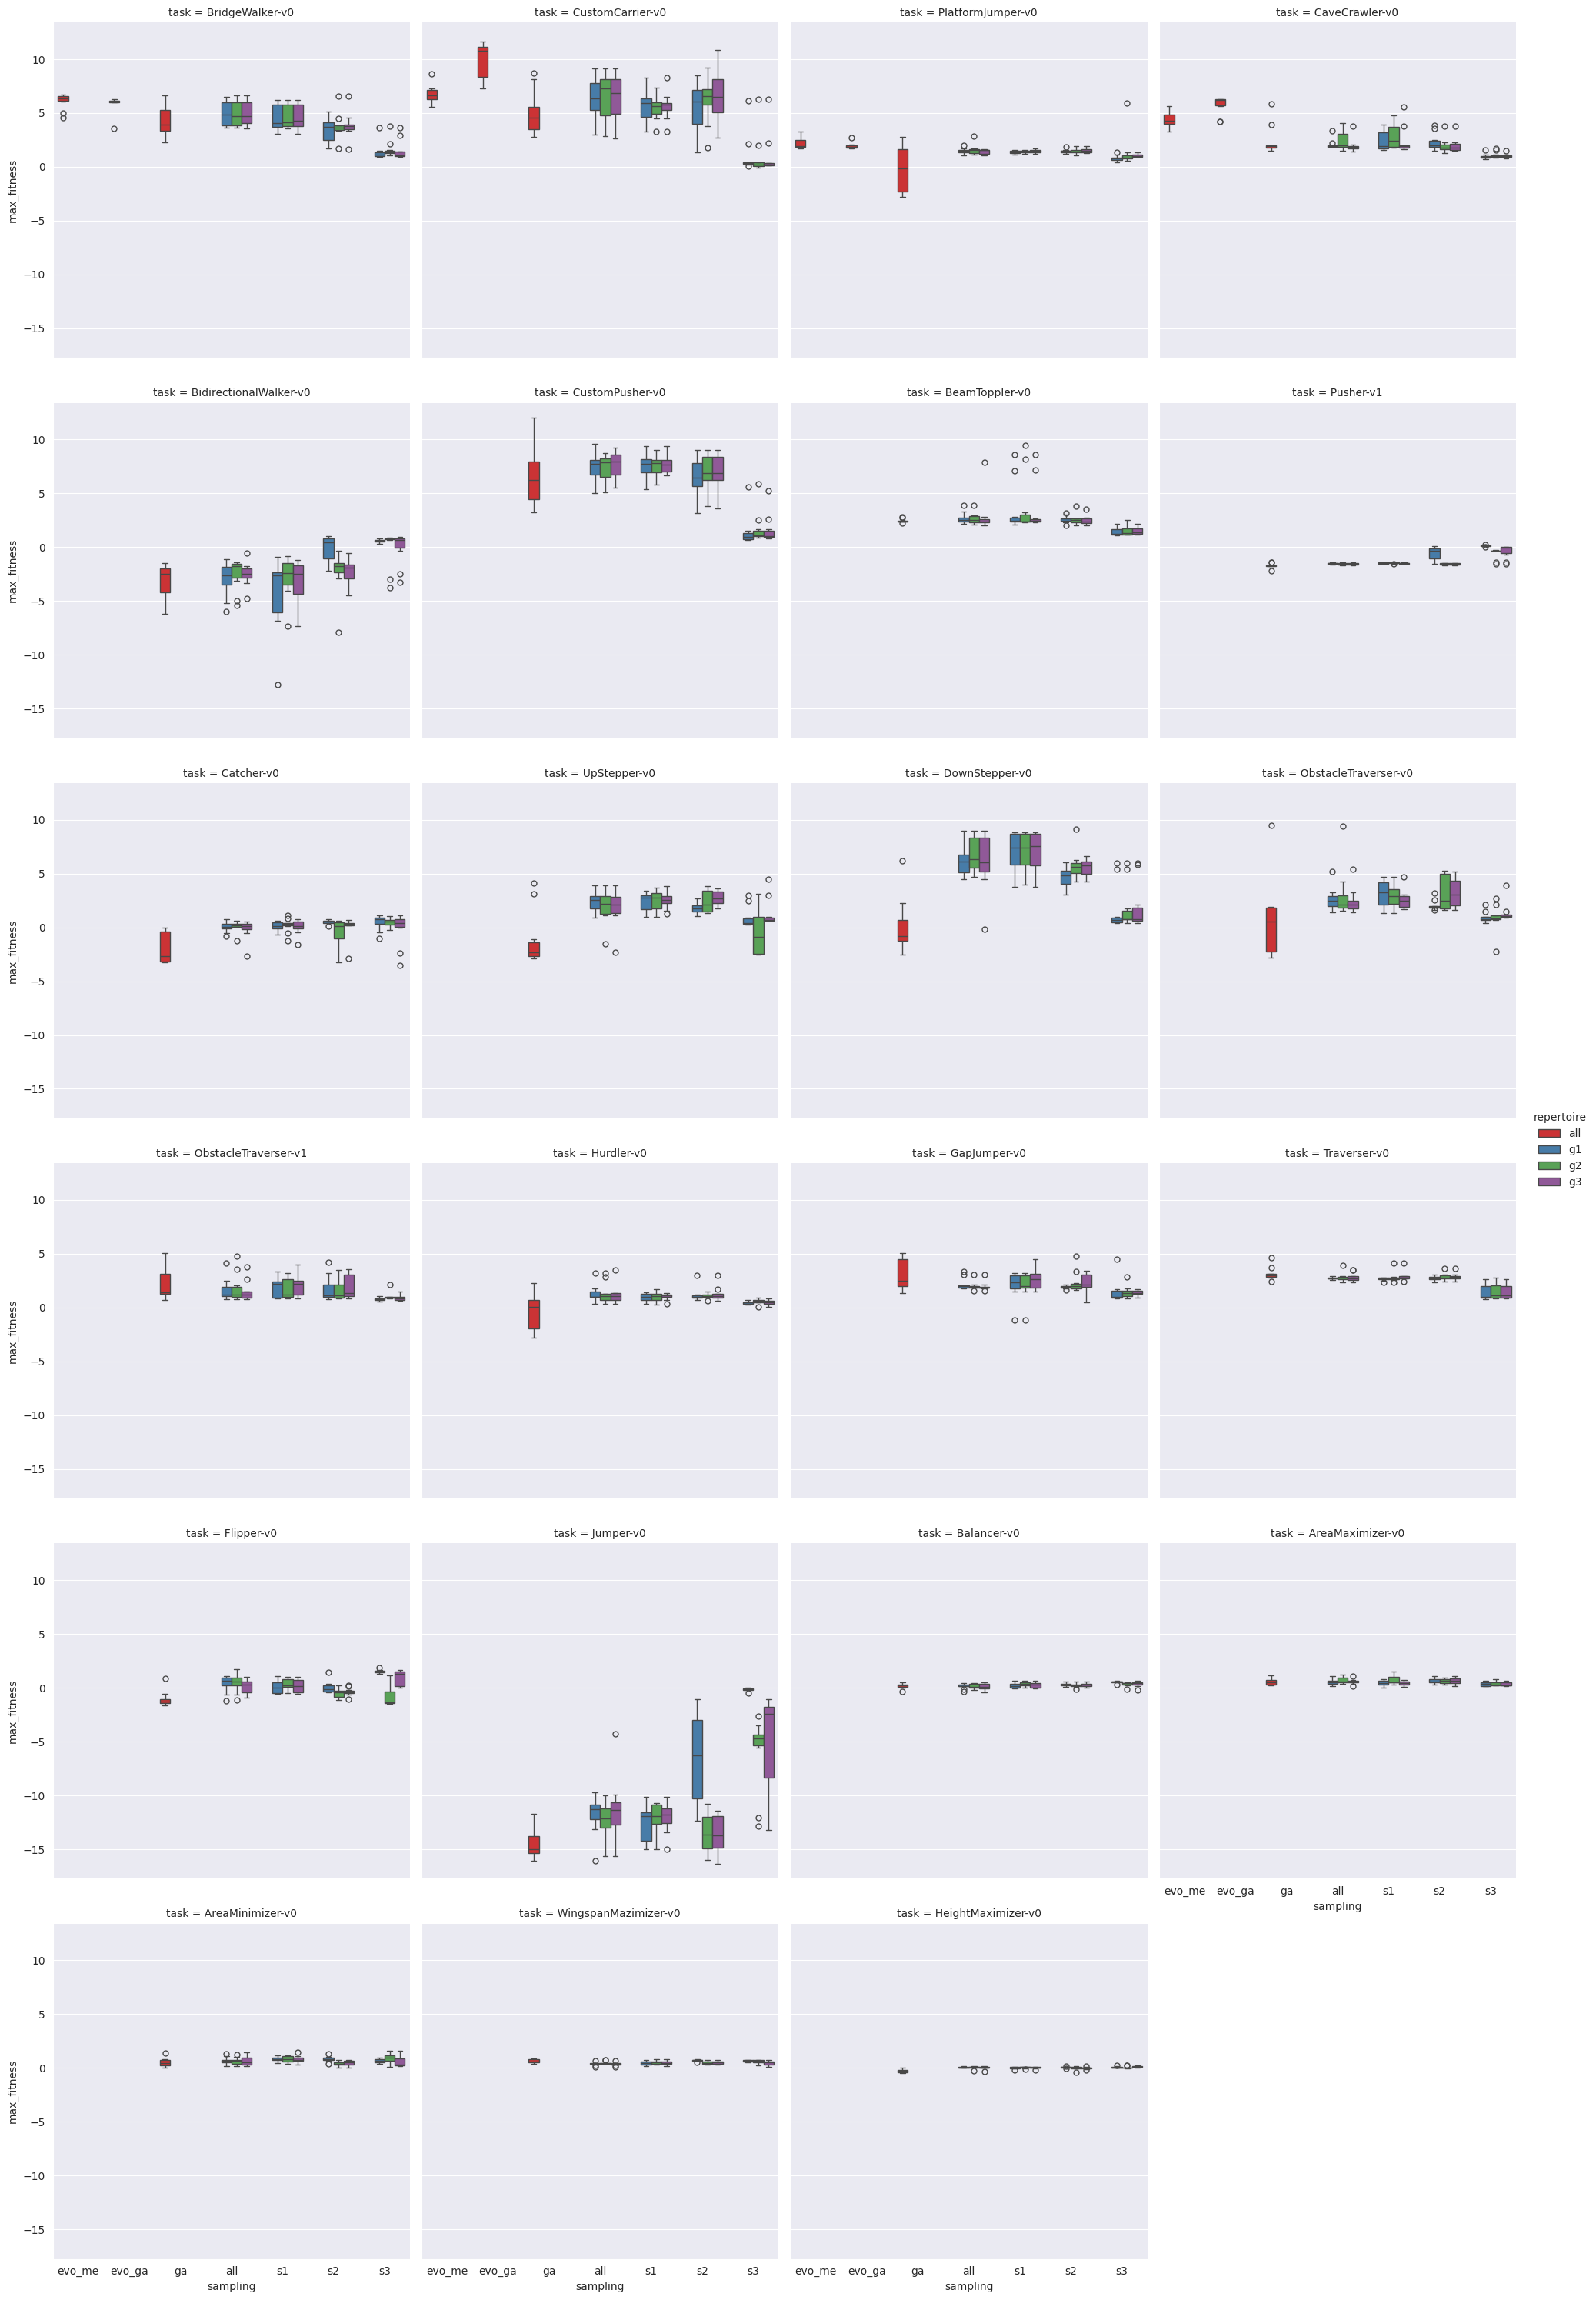

In [11]:
sns.catplot(df,
            x="sampling",
            y="max_fitness",
            col="task",
            col_wrap=4,
            hue="repertoire",
            palette="Set1",
            kind="box",
            )
plt.show()

In [26]:
df_transferred = df[~df["sampling"].str.contains("evo")].reset_index(drop=True)
df_transferred["solve_fraction"] = df_transferred["max_fitness"] / df_transferred["task_expected_reward"]
df_transferred["task_with_type"] = df_transferred["task_type"].str[0].str.upper() + "-" + \
                                   df_transferred["task"]
df_transferred_and_solved = df_transferred[df_transferred["task"].isin(solved_tasks)]
df_best_transfer_per_evo_way_int = df_transferred_and_solved.loc[
    df_transferred_and_solved.groupby(["task", "task_type", "sampling", "seed"])["max_fitness"].idxmax()]
df_best_transfer_per_evo_way_int["rank"] = df_best_transfer_per_evo_way_int.groupby(["task", "task_type"])[
                                               "max_fitness"].rank(
    method="dense",
    ascending=True) / 50.
df_best_transfer_per_evo_way = \
    df_best_transfer_per_evo_way_int.groupby(["task", "task_type", "task_with_type", "sampling"])[
        "rank"].mean().reset_index()
df_best_transferred_mean_solve_fraction = df_transferred.groupby(["task", "task_type", "task_with_type", "sampling"])[
    "solve_fraction"].mean().reset_index()
df_best_transfer_per_evo_way.head()

,task,task_type,task_with_type,sampling,rank
0,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,all,0.460
1,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,ga,0.288
2,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,s1,0.578
3,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,s2,0.556
4,AreaMinimizer-v0,shape,S-AreaMinimizer-v0,s3,0.668


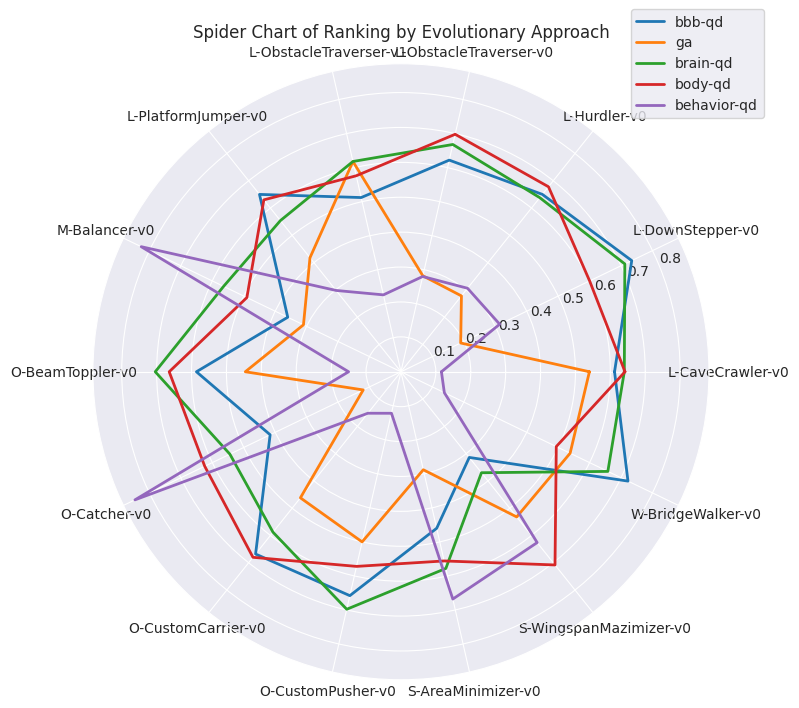

In [13]:
df_best_transfer_per_evo_way_pivot = df_best_transfer_per_evo_way.pivot(index="sampling", columns="task_with_type",
                                                                        values="rank")
qd_mapping = {
    "s1": "brain-qd",
    "s2": "body-qd",
    "s3": "behavior-qd",
    "all": "bbb-qd",
    "ga": "ga"
}
# Replace the sampling names in the DataFrame
df_best_transfer_per_evo_way_pivot.index = df_best_transfer_per_evo_way_pivot.index.map(qd_mapping)
categories = df_best_transfer_per_evo_way_pivot.columns.tolist()  # Tasks as categories
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for sampling, row in df_best_transfer_per_evo_way_pivot.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the shape
    ax.plot(angles, values, label=sampling, linewidth=2)
    # ax.fill(angles, values, alpha=0.25)
# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title("Spider Chart of Ranking by Evolutionary Approach")

plt.show()

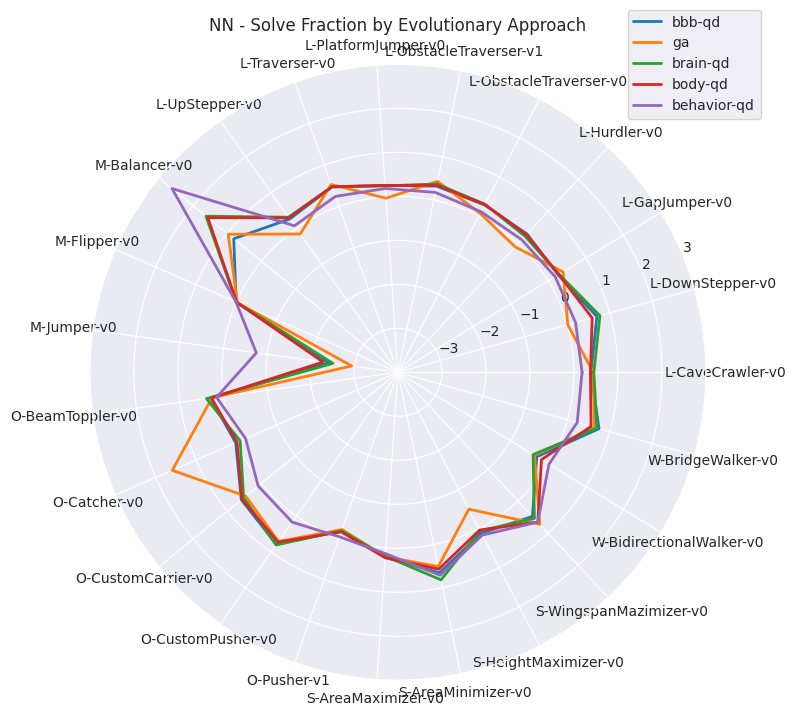

In [30]:
df_transferred_pivot = df_best_transferred_mean_solve_fraction.pivot(index="sampling", columns="task_with_type",
                                                                     values="solve_fraction")
qd_mapping = {
    "s1": "brain-qd",
    "s2": "body-qd",
    "s3": "behavior-qd",
    "all": "bbb-qd",
    "ga": "ga"
}
# Replace the sampling names in the DataFrame
df_transferred_pivot.index = df_transferred_pivot.index.map(qd_mapping)
categories = df_transferred_pivot.columns.tolist()  # Tasks as categories
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for sampling, row in df_transferred_pivot.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the shape
    ax.plot(angles, values, label=sampling, linewidth=2)
    ax.set_ylim(-4, 3)
    # ax.fill(angles, values, alpha=0.25)
# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title("NN - Solve Fraction by Evolutionary Approach")

plt.show()

In [14]:
df_transferred_qd = df_transferred[df_transferred["sampling"] != "ga"].reset_index(drop=True)
df_transferred_qd["rank"] = df_transferred_qd.groupby(["task", "task_type", "sampling"])["max_fitness"].rank(
    method="dense",
    ascending=True) / 30.
df_transferred_qd = df_transferred_qd[["task", "task_type", "sampling", "repertoire", "rank"]]
df_transferred_qd_mean = df_transferred_qd.groupby(["task", "task_type", "sampling", "repertoire"])[
    "rank"].mean().reset_index()
df_transferred_qd_mean["task_with_type"] = df_transferred_qd_mean["task_type"].str[0].str.upper() + "-" + \
                                           df_transferred_qd_mean["task"]
df_transferred_qd_mean.head()

,task,task_type,sampling,repertoire,rank,task_with_type
0,AreaMinimizer-v0,shape,all,g1,0.410000,S-AreaMinimizer-v0
1,AreaMinimizer-v0,shape,all,g2,0.390000,S-AreaMinimizer-v0
2,AreaMinimizer-v0,shape,all,g3,0.373333,S-AreaMinimizer-v0
3,AreaMinimizer-v0,shape,s1,g1,0.430000,S-AreaMinimizer-v0
4,AreaMinimizer-v0,shape,s1,g2,0.430000,S-AreaMinimizer-v0


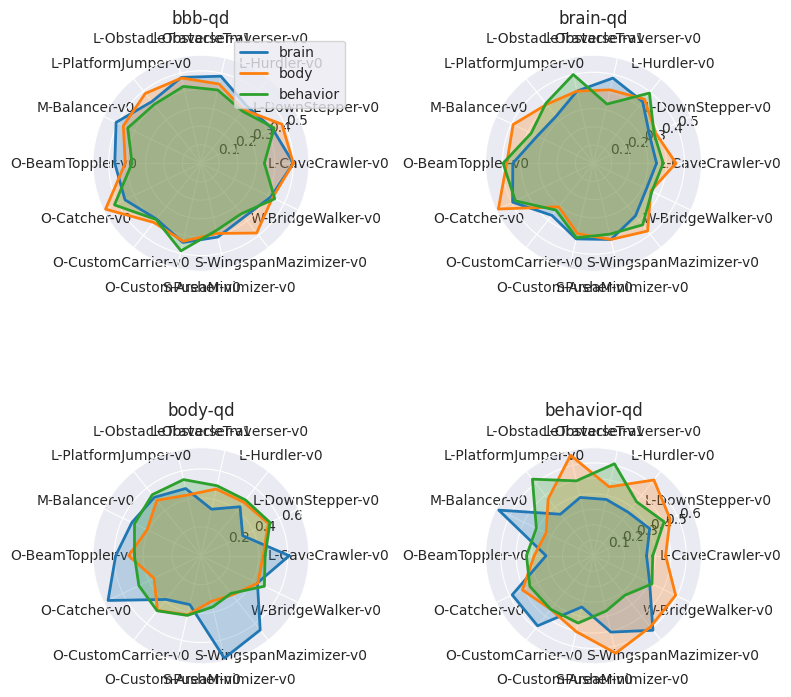

In [15]:
qd_methods = df_transferred_qd_mean["sampling"].unique()
# Setup subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8), subplot_kw=dict(polar=True))  # 2x2 grid
axes = axes.flatten()  # Flatten the axes for easy iteration

reps_mapping = {
    "g1": "brain",
    "g2": "body",
    "g3": "behavior",
}

# Loop through each group and create a radar chart
for i, group in enumerate(qd_methods):
    ax = axes[i]

    # Filter DataFrame for the current group
    df_group = df_transferred_qd_mean[df_transferred_qd_mean["sampling"] == group]

    # Pivot DataFrame for plotting
    df_pivot = df_group.pivot(index="repertoire", columns="task_with_type", values="rank")

    # Rename samplings in the pivoted DataFrame
    df_pivot.index = df_pivot.index.map(reps_mapping)

    # Get task names and define angles
    categories = df_pivot.columns.tolist()
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Close the shape

    # Plot each sampling method
    for sampling, row in df_pivot.iterrows():
        values = row.tolist()
        values += values[:1]  # Close the shape
        ax.plot(angles, values, label=sampling, linewidth=2)
        ax.fill(angles, values, alpha=0.25)

    # Labels and title
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(qd_mapping[group])

    # Add legend only to the first subplot
    if i == 0:
        ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# Adjust layout
plt.tight_layout()
plt.show()

In [2]:
original_d_tmp = pd.read_csv("../results/transfer_nn_pca/original_descriptors.csv")
id_cols = ["sampler", "seed", "environment"]
melt_cols = [col for col in original_d_tmp.columns if col not in id_cols]
original_d_melted = original_d_tmp.melt(id_vars=id_cols, value_vars=melt_cols, var_name="category", value_name="value")
original_d_melted["repertoire"] = original_d_melted["category"].str.extract(r'([^_]+)')
original_d_melted["descriptor_id"] = original_d_melted["category"].str.extract(r'(\d)').astype(int)
original_descriptors = original_d_melted.pivot(index=id_cols + ["repertoire"], columns="descriptor_id",
                                               values="value").reset_index()
original_descriptors.columns = id_cols + ["repertoire", "d0", "d1"]
original_descriptors = original_descriptors[["d0", "d1", "repertoire"] + id_cols]
original_descriptors.head()

,d0,d1,repertoire,sampler,seed,environment
0,-1.00,-1.000,behavior,all,0,AreaMaximizer-v0
1,-1.00,-1.000,body,all,0,AreaMaximizer-v0
2,-1.00,-1.000,brain,all,0,AreaMaximizer-v0
3,0.65,0.125,behavior,all,0,AreaMinimizer-v0
4,0.65,0.125,body,all,0,AreaMinimizer-v0


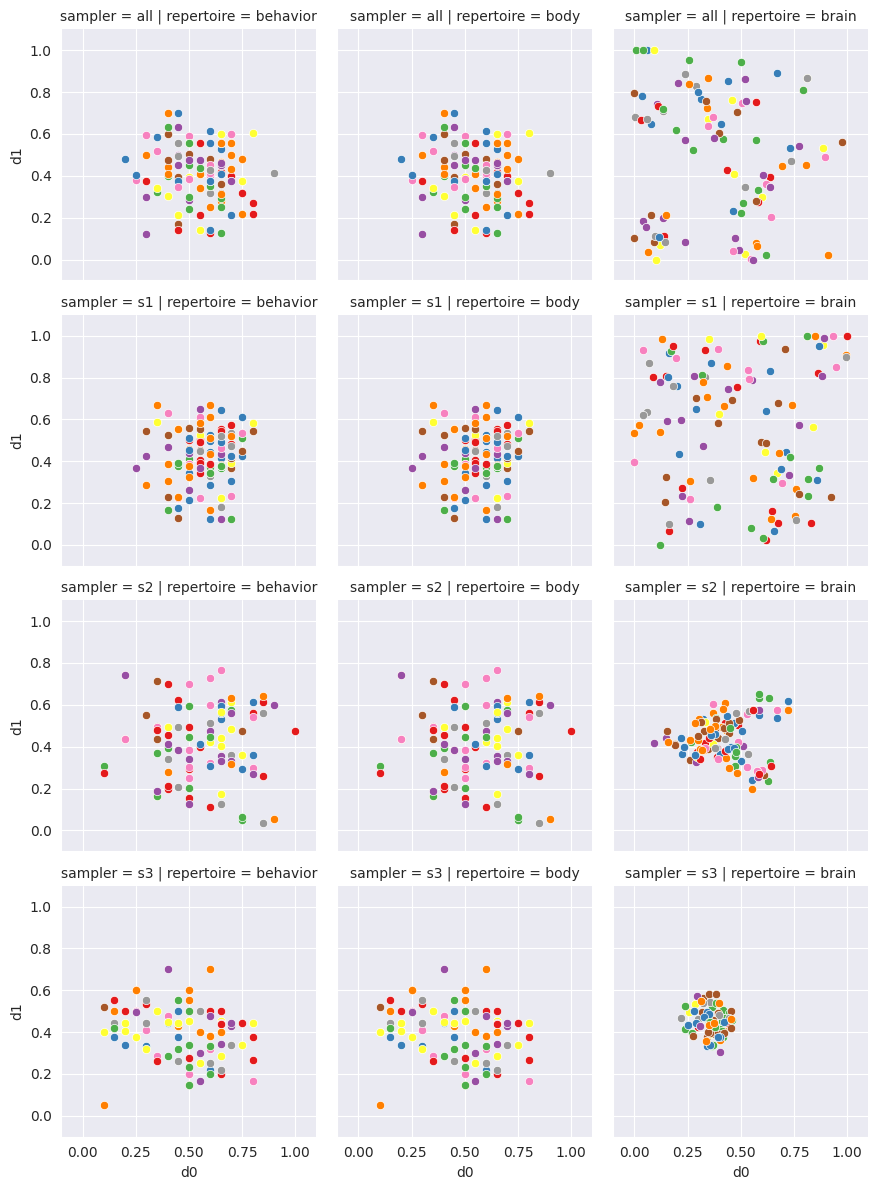

In [3]:
g = sns.FacetGrid(original_descriptors,
                  col="repertoire",
                  row="sampler",
                  palette="Set1",
                  hue="environment",
                  )
g.map(sns.scatterplot, "d0", "d1")
g.set(xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))
plt.show()

In [10]:
best_provenience = original_d_tmp
best_provenience['all'] = (
            (best_provenience['brain_descriptors_0'] >= 0) & (best_provenience['body_descriptors_0'] >= 0) & (
                best_provenience['behavior_descriptors_0'] >= 0)).astype(int)
best_provenience['brain'] = (best_provenience['brain_descriptors_0'] >= 0).astype(int)
best_provenience['body'] = (best_provenience['body_descriptors_0'] >= 0).astype(int)
best_provenience['behavior'] = (best_provenience['behavior_descriptors_0'] >= 0).astype(int)
best_provenience.head()

,sampler,seed,environment,brain_descriptors_0,brain_descriptors_1,body_descriptors_0,body_descriptors_1,behavior_descriptors_0,behavior_descriptors_1,all,brain,body,behavior
0,all,0,BridgeWalker-v0,-1.000000,-1.000000,0.5,0.394479,0.5,0.394479,0,0,1,1
1,all,0,PlatformJumper-v0,-1.000000,-1.000000,0.6,0.125000,0.6,0.125000,0,0,1,1
2,all,0,CaveCrawler-v0,0.895186,0.490716,0.3,0.597011,0.3,0.597011,1,1,1,1
3,all,0,CustomCarrier-v0,0.734441,0.468394,-1.0,-1.000000,-1.0,-1.000000,0,1,0,0
4,all,0,BidirectionalWalker-v0,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,0,0,0,0


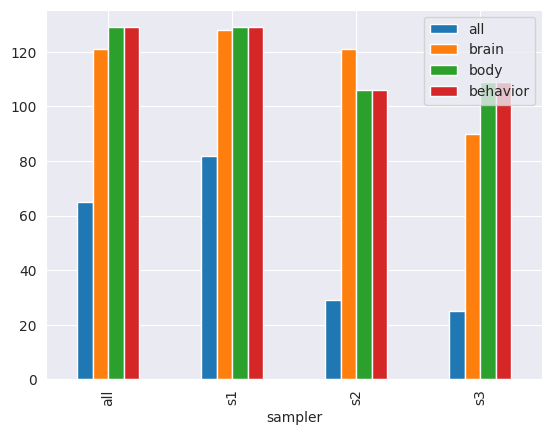

In [14]:
best_provenience_grouped = best_provenience.groupby('sampler')[['all', 'brain', 'body', 'behavior']].sum()
best_provenience_grouped.plot(kind='bar', stacked=False)
plt.show()

In [33]:
from pathlib import Path
import yaml
from bbbqd.body.body_utils import compute_body_mask, compute_body_float_genome_length, compute_body_encoding_function

seed = 0
dest_rep = "r2"
sampling = "all"
for task in tasks:
    print(task.replace("-v0", ""), end=" & &")
    for origin_rep_id in range(1, 4):
        origin_rep = f"g{origin_rep_id}"
        folder = f"../results/transfer_nn_pca/me_PCA-evo-body-10x10-walker-{sampling}_{seed}_{origin_rep}_{task}"
        config = yaml.load(Path(f"{folder}/config.yaml").read_text(), Loader=yaml.FullLoader)
        body_encoding_fn = compute_body_encoding_function(config)
        fitnesses = jnp.load(f"{folder}/{dest_rep}_fitnesses.npy")
        genotypes = jnp.load(f"{folder}/{dest_rep}_genotypes.npy")
        best_genotype = genotypes[jnp.argmax(fitnesses)]
        body_mask_length = len(compute_body_mask(config))
        body_float_length = compute_body_float_genome_length(config)
        body_genome, controller_genome = jnp.split(best_genotype, [body_mask_length + body_float_length])
        body = body_encoding_fn(body_genome)
        body = np.delete(body, np.argwhere(np.all(body[..., :] == 0, axis=0)), axis=1)  # remove empty columns
        body = np.delete(body, np.argwhere(np.all(body[..., :] == 0, axis=1)), axis=0)  # remove empty rows
        h, w = body.shape
        body_string = "-".join("".join(map(str, r)) for r in body)
        latex_command = f"\\vsrevogym{{{w}}}{{{h}}}{{{body_string}}}"
        print(latex_command, end=" & ")
    print()

BridgeWalker & &\vsrevogym{7}{7}{0000044-0040430-0220400-0122400-1003400-3143000-0400000} & \vsrevogym{6}{6}{001243-432410-002400-410400-121400-044000} & \vsrevogym{7}{7}{0003411-0031310-0001300-0020400-0021400-3342000-2000000} & 
CustomCarrier & &\vsrevogym{6}{7}{003431-031310-001300-110400-021400-342000-040000} & \vsrevogym{8}{7}{00000044-00040130-00040400-00032400-32031400-04123000-00200000} & \vsrevogym{7}{6}{0002412-0032340-0000300-0110400-3344400-2022000} & 
PlatformJumper & &\vsrevogym{5}{6}{02413-02421-00143-00440-03144-24020} & \vsrevogym{6}{6}{133300-344000-304000-313411-214000-304000} & \vsrevogym{5}{6}{00422-02421-00443-00344-04344-24040} & 
CaveCrawler & &\vsrevogym{10}{6}{0000041444-3404330400-0443000400-0440000000-3400000000-3000000000} & \vsrevogym{8}{9}{00000004-00000002-00000014-00000240-00000400-00242400-02002400-21422000-00400000} & \vsrevogym{9}{7}{000000022-000000240-000000400-110002400-032001400-023121000-002400000} & 
BidirectionalWalker & &

FileNotFoundError: [Errno 2] No such file or directory: '../results/transfer_nn_pca/me_PCA-evo-body-10x10-walker-all_0_g1_BidirectionalWalker-v0/config.yaml'

In [10]:
from pathlib import Path
import yaml
from bbbqd.body.body_utils import compute_body_mask, compute_body_float_genome_length, compute_body_encoding_function

seed = 0
dest_rep = "r2"
sampling = "all"
for task in ["walker"] + tasks:
    print(task.replace('-v0', ''), end=" ")
    folder = f"../results/me_nn/PCA-evo-body-10x10-{task.replace('-v0', '').lower()}-{sampling}_{seed}"
    config = yaml.load(Path(f"{folder}/config.yaml").read_text(), Loader=yaml.FullLoader)
    body_encoding_fn = compute_body_encoding_function(config)
    fitnesses = jnp.load(f"{folder}/{dest_rep}_fitnesses.npy")
    genotypes = jnp.load(f"{folder}/{dest_rep}_genotypes.npy")
    best_genotype = genotypes[jnp.argmax(fitnesses)]
    body_mask_length = len(compute_body_mask(config))
    body_float_length = compute_body_float_genome_length(config)
    body_genome, controller_genome = jnp.split(best_genotype, [body_mask_length + body_float_length])
    body = body_encoding_fn(body_genome)
    body = np.delete(body, np.argwhere(np.all(body[..., :] == 0, axis=0)), axis=1)  # remove empty columns
    body = np.delete(body, np.argwhere(np.all(body[..., :] == 0, axis=1)), axis=0)  # remove empty rows
    h, w = body.shape
    body_string = "-".join("".join(map(str, r)) for r in body)
    latex_command = f"\\vsrevogym{{{w}}}{{{h}}}{{{body_string}}}"
    print(latex_command)

walker \vsrevogym{8}{7}{24400400-30420311-00220400-00343400-00100000-00300000-00400000}
BridgeWalker \vsrevogym{5}{7}{00032-00304-04204-00324-00044-01334-31430}
CustomCarrier \vsrevogym{8}{7}{00300000-41420000-02010000-33000100-03333320-00000414-00000020}
PlatformJumper \vsrevogym{5}{9}{02400-14000-43300-24234-01440-04000-03000-41000-40000}
CaveCrawler \vsrevogym{10}{6}{0000043233-0024334144-0040000000-0040000000-3440000000-2400000000}
